In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
SFdata = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/san_francisco_data')

In [3]:
SFdata.head()


,propertyType,lotAreaValue,address,price,bedrooms,longitude,latitude,zpid,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,city
0,SINGLE_FAMILY,3001.284,"1723 11th Ave, San Francisco, CA 94122",995000,2.0,-122.46822,37.755990,15111551,1.0,1038.0,NaN,NaN,San Francisco
1,SINGLE_FAMILY,3125.000,"170 Thrift St, San Francisco, CA 94112",898000,4.0,-122.45815,37.717720,15192217,2.0,1845.0,NaN,NaN,San Francisco
2,SINGLE_FAMILY,2495.988,"1631 La Salle Ave, San Francisco, CA 94124",995000,4.0,-122.38945,37.736630,15156010,4.0,2430.0,NaN,NaN,San Francisco
3,SINGLE_FAMILY,3036.132,"411 Clipper St, San Francisco, CA 94114",998000,3.0,-122.43447,37.748610,15181544,1.0,1470.0,NaN,NaN,San Francisco
4,SINGLE_FAMILY,1746.756,"1710 33rd Ave, San Francisco, CA 94122",988000,2.0,-122.49134,37.755177,15110735,1.0,1025.0,NaN,NaN,San Francisco


In [4]:
SFdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   propertyType               2237 non-null   object 
 1   lotAreaValue               1752 non-null   float64
 2   address                    2237 non-null   object 
 3   price                      2237 non-null   int64  
 4   bedrooms                   2234 non-null   float64
 5   longitude                  2197 non-null   float64
 6   latitude                   2197 non-null   float64
 7   zpid                       2237 non-null   int64  
 8   bathrooms                  2237 non-null   float64
 9   livingArea                 2234 non-null   float64
 10  newConstructionType        273 non-null    object 
 11  listingSubType.is_newHome  273 non-null    object 
 12  city                       2237 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage:

In [5]:
SFdata.isna().sum()

propertyType                    0
lotAreaValue                  485
address                         0
price                           0
bedrooms                        3
longitude                      40
latitude                       40
zpid                            0
bathrooms                       0
livingArea                      3
newConstructionType          1964
listingSubType.is_newHome    1964
city                            0
dtype: int64

In [6]:
#removing data if lotAreaValue, bedrooms, longitude, latitude, livingArea is NaN:
SFdata = SFdata.dropna(subset =['bedrooms', 'longitude', 'latitude', 'livingArea'])

In [7]:
#changing newConstructionType and listingSubType.is_newHome NaN values to False:
SFdata['newConstructionType'] = SFdata['newConstructionType'].fillna('False')


In [8]:
SFdata['listingSubType.is_newHome'] = SFdata['listingSubType.is_newHome'].fillna('False')

In [9]:
SFdata.isna().sum()

propertyType                   0
lotAreaValue                 470
address                        0
price                          0
bedrooms                       0
longitude                      0
latitude                       0
zpid                           0
bathrooms                      0
livingArea                     0
newConstructionType            0
listingSubType.is_newHome      0
city                           0
dtype: int64

In [10]:
# checking all data with lot area value Nan
print(SFdata[SFdata['lotAreaValue'].isnull()])

       propertyType  lotAreaValue  \
23    SINGLE_FAMILY           NaN   
24    SINGLE_FAMILY           NaN   
147   SINGLE_FAMILY           NaN   
153   SINGLE_FAMILY           NaN   
154   SINGLE_FAMILY           NaN   
...             ...           ...   
2226  SINGLE_FAMILY           NaN   
2228  SINGLE_FAMILY           NaN   
2229  SINGLE_FAMILY           NaN   
2230  SINGLE_FAMILY           NaN   
2231  SINGLE_FAMILY           NaN   

                                                address    price  bedrooms  \
23                                111 Plan, 1288 Howard   585000       1.0   
24                    Loft Residences Plan, 1288 Howard   585000       1.0   
147                     Plan D1 Plan, Lofton at Portola  1599900       3.0   
153                      Plan A Plan, Lofton at Portola  1599900       3.0   
154   The Bristol - Residence #427 Plan, Residences ...  1710000       2.0   
...                                                 ...      ...       ...   
2226     

In [11]:
#we can see that there are some SINGLE_FAMILY properties with NaN values which we would like to remove, 
#but condo or townhouse lot Area we could simply change to save data.
#looking at the addreses, we can see that single_family properties with Nan values 
#of lot Area are only future plans. 
#Replacing Nan values with 0. 

SFdata['lotAreaValue'] = SFdata['lotAreaValue'].fillna(0)

In [12]:
SFdata.isna().sum()

propertyType                 0
lotAreaValue                 0
address                      0
price                        0
bedrooms                     0
longitude                    0
latitude                     0
zpid                         0
bathrooms                    0
livingArea                   0
newConstructionType          0
listingSubType.is_newHome    0
city                         0
dtype: int64

In [13]:
#there is no Nan values in dataframe
#adding colum price_per_sqf and calculating the values

SFdata['price_per_sqf'] = round(SFdata['price']/SFdata['livingArea'])

In [14]:
SFdata.head()

,propertyType,lotAreaValue,address,price,bedrooms,longitude,latitude,zpid,bathrooms,livingArea,newConstructionType,listingSubType.is_newHome,city,price_per_sqf
0,SINGLE_FAMILY,3001.284,"1723 11th Ave, San Francisco, CA 94122",995000,2.0,-122.46822,37.755990,15111551,1.0,1038.0,False,False,San Francisco,959.0
1,SINGLE_FAMILY,3125.000,"170 Thrift St, San Francisco, CA 94112",898000,4.0,-122.45815,37.717720,15192217,2.0,1845.0,False,False,San Francisco,487.0
2,SINGLE_FAMILY,2495.988,"1631 La Salle Ave, San Francisco, CA 94124",995000,4.0,-122.38945,37.736630,15156010,4.0,2430.0,False,False,San Francisco,409.0
3,SINGLE_FAMILY,3036.132,"411 Clipper St, San Francisco, CA 94114",998000,3.0,-122.43447,37.748610,15181544,1.0,1470.0,False,False,San Francisco,679.0
4,SINGLE_FAMILY,1746.756,"1710 33rd Ave, San Francisco, CA 94122",988000,2.0,-122.49134,37.755177,15110735,1.0,1025.0,False,False,San Francisco,964.0


In [15]:
#summary stats table transposed for data frame
SFdata.describe().T

,count,mean,std,min,25%,50%,75%,max
lotAreaValue,2194.0,3.360925e+03,4.365262e+03,0.000000e+00,0.000000e+00,2.770416e+03,6.089688e+03,1.494110e+05
price,2194.0,1.377320e+06,6.954993e+05,2.750000e+05,8.980000e+05,1.250000e+06,1.698000e+06,8.888888e+06
bedrooms,2194.0,3.063355e+00,1.022812e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
longitude,2194.0,-1.220392e+02,2.241157e-01,-1.225524e+02,-1.222439e+02,-1.219649e+02,-1.218763e+02,-1.214928e+02
latitude,2194.0,3.756664e+01,2.273132e-01,3.709799e+01,3.735958e+01,3.754545e+01,3.774311e+01,3.808270e+01
zpid,2194.0,3.134560e+08,6.939182e+08,1.506777e+07,1.925120e+07,1.980112e+07,6.803219e+07,2.146012e+09
bathrooms,2194.0,2.427074e+00,8.791116e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
livingArea,2194.0,1.649666e+03,5.875356e+02,0.000000e+00,1.229250e+03,1.593500e+03,2.029750e+03,5.768000e+03
price_per_sqf,2194.0,inf,NaN,2.690000e+02,6.390000e+02,7.880000e+02,9.817500e+02,inf


In [16]:
SFdata = SFdata.loc[SFdata['livingArea']>0]
#san_jose_data = single_fam_data.loc[single_fam_data['city']=='San Jose']

In [17]:
SFdata.describe().T

,count,mean,std,min,25%,50%,75%,max
lotAreaValue,2176.0,3.364876e+03,4.381297e+03,0.000000e+00,0.000000e+00,2.785662e+03,6.098400e+03,1.494110e+05
price,2176.0,1.373251e+06,6.951595e+05,2.750000e+05,8.950000e+05,1.249400e+06,1.698000e+06,8.888888e+06
bedrooms,2176.0,3.065257e+00,1.022670e+00,0.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,9.000000e+00
longitude,2176.0,-1.220361e+02,2.222955e-01,-1.225524e+02,-1.222418e+02,-1.219634e+02,-1.218755e+02,-1.214928e+02
latitude,2176.0,3.756516e+01,2.276635e-01,3.709799e+01,3.735878e+01,3.754244e+01,3.774166e+01,3.808270e+01
zpid,2176.0,3.149780e+08,6.952733e+08,1.506777e+07,1.947141e+07,1.980390e+07,6.803515e+07,2.146012e+09
bathrooms,2176.0,2.428768e+00,8.791216e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
livingArea,2176.0,1.663312e+03,5.703917e+02,2.050000e+02,1.239500e+03,1.601500e+03,2.033000e+03,5.768000e+03
price_per_sqf,2176.0,8.374651e+02,3.223077e+02,2.690000e+02,6.377500e+02,7.855000e+02,9.760000e+02,4.271000e+03


In [18]:
#checking how data is distributed depending on property Type

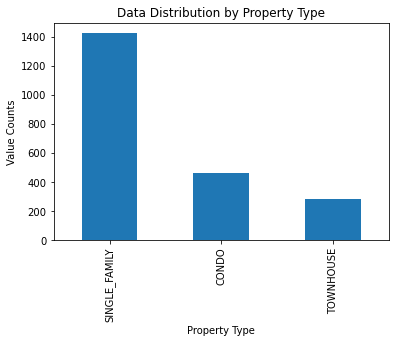

In [19]:
SFdata['propertyType'].value_counts().plot(kind='bar')
_=plt.xlabel('Property Type')
_ = plt.ylabel('Value Counts')
_ = plt.title('Data Distribution by Property Type')

Single Family properties takes the most part of the data. Calculations from this data can draw most accurate results.

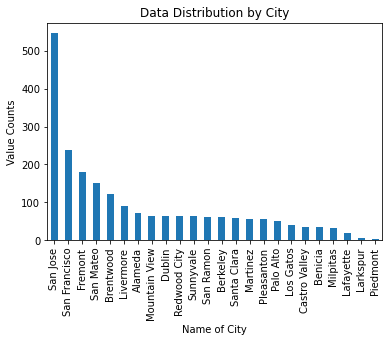

In [20]:
#checking how data is distributed depending on city
SFdata['city'].value_counts().plot(kind='bar')
_=plt.xlabel('Name of City')
_ = plt.ylabel('Value Counts')
_ = plt.title('Data Distribution by City')

San Jose city has significantly more data than any other city. For the future data analysis keeping in mind that the most accurate results can be drawn from San Jose and San Francisco city data. Fremont, San Mateo and Brentwood are 3 more cities with higher than 100 value counts.

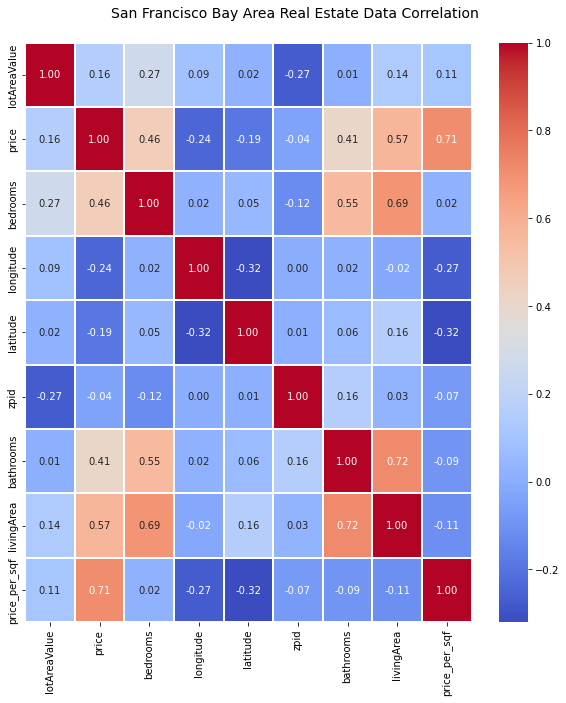

In [21]:

#Create a correlation heatmap for looking at the correlation of all numerical Bay Area Data
corrmat = SFdata.corr()
f, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('San Francisco Bay Area Real Estate Data Correlation', fontsize=14)

strong correlation:
price/price_per_sqf = 0.71
price/livingArea = 0.57
price/bathrooms = 0.41
price/bedrooms = 0.46
bathrooms/livingArea = 0.70
bathrooms/bedrooms = 0.56
bedrooms/livingArea = 0.69


In [22]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [23]:
#cheching correlation between categorical values such as property type and city
from dython.nominal import associations
# code applied from https://www.youtube.com/watch?v=sYZ2KfT7Ryc

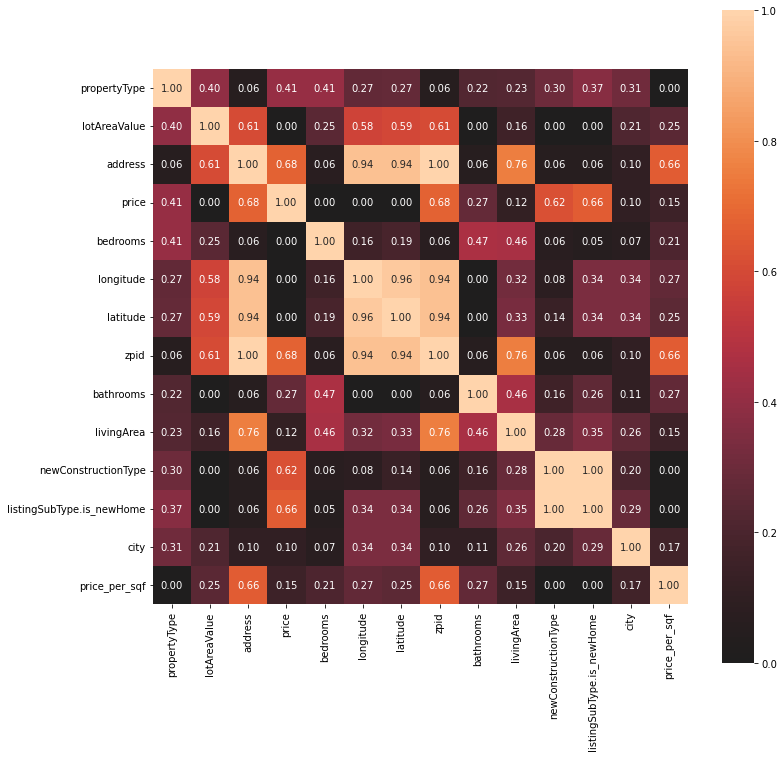

{'corr':                            propertyType  lotAreaValue   address     price  \
 propertyType                   1.000000      0.398121  0.060676  0.412778   
 lotAreaValue                   0.398121      1.000000  0.605314  0.000000   
 address                        0.060676      0.605314  1.000000  0.679314   
 price                          0.412778      0.000000  0.679314  1.000000   
 bedrooms                       0.411638      0.248212  0.064445  0.000000   
 longitude                      0.265822      0.576808  0.937601  0.000000   
 latitude                       0.273517      0.587005  0.941040  0.000000   
 zpid                           0.060676      0.605314  1.000000  0.679314   
 bathrooms                      0.224345      0.000000  0.060746  0.274679   
 livingArea                     0.227561      0.156340  0.756757  0.115483   
 newConstructionType            0.301100      0.000000  0.060690  0.619098   
 listingSubType.is_newHome      0.370106      0.000000  

In [24]:
associations(SFdata, nominal_columns='all', figsize = (12,12))

highest price correlation is with:
listingSubType.is_newHome = 0.66
newConstructionType = 0.62
zpid = 0.68
address = 0.68
propertyType = 0.42

# Highest correlations 
<b> numerical values </b>
<br>price/livingArea = 0.57 
<br>price/bathrooms = 0.41 
<br>price/bedrooms = 0.46 
<br>bathrooms/livingArea = 0.70 bathrooms/bedrooms = 0.56 bedrooms/livingArea = 0.69
<br> <b> categorical values </b>
<br>price and listingSubType.is_newHome = 0.66 
<br>newConstructionType = 0.62 
<br>zpid = 0.68 
<br>address = 0.68 
<br>propertyType = 0.42

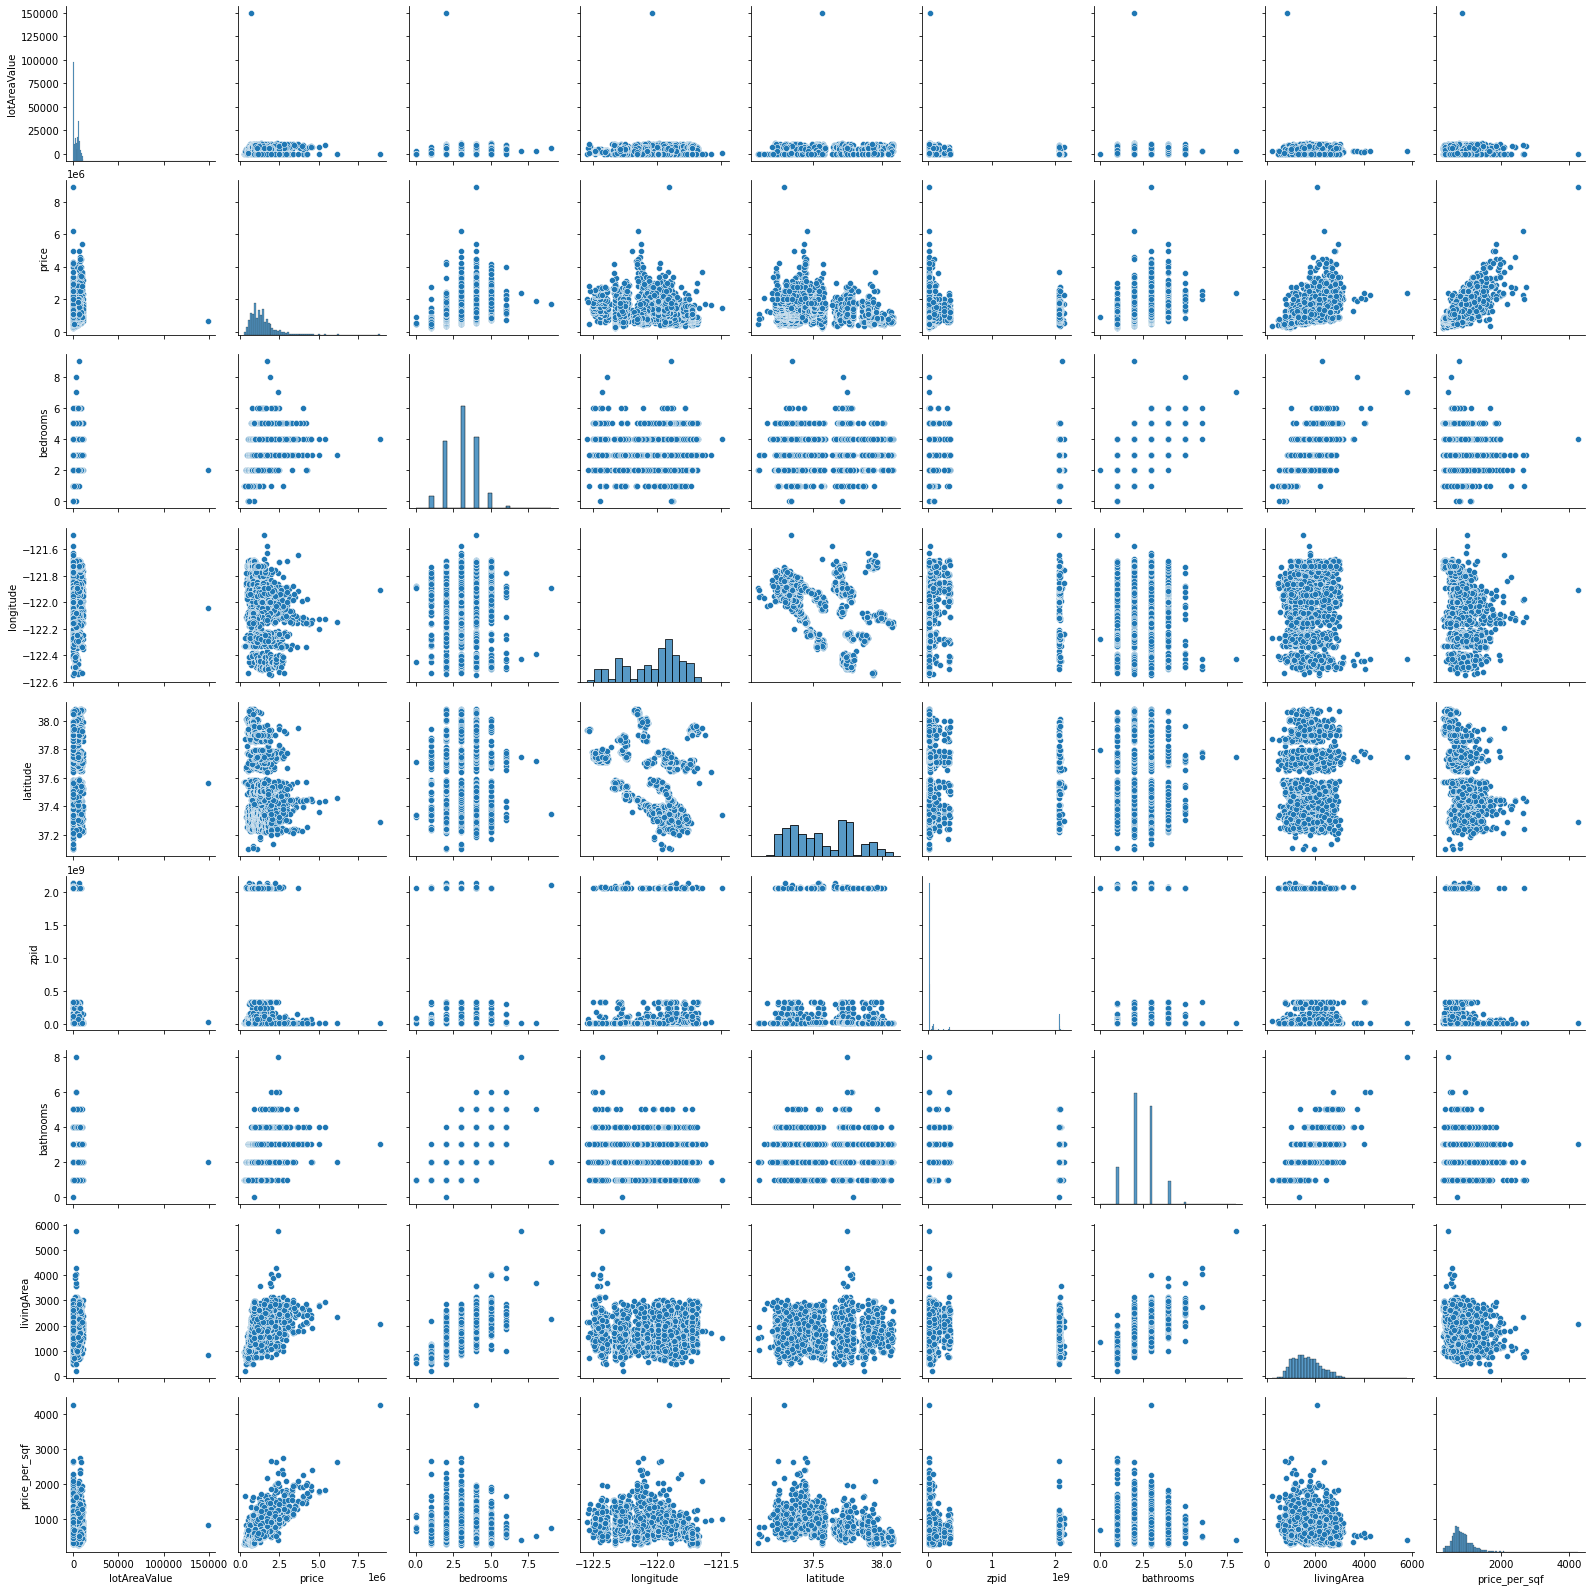

In [25]:
#Create a pairplot for all numeric variables
sns.pairplot(SFdata,  palette='Set1')
plt.show()

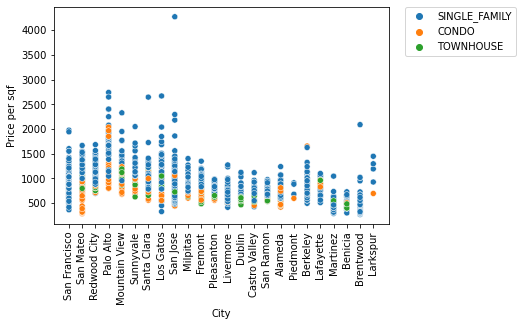

In [26]:
#creating a graph with data, living area, price per sqf in each city

sns.scatterplot(data=SFdata, x="city", y="price_per_sqf", hue="propertyType")



plt.xlabel("City")
plt.ylabel("Price per sqf")
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [27]:
#there is one point outlier in the data, single family property, with price per sqf over 4000. 
#checking on that data:

outlier = SFdata.loc[SFdata['price_per_sqf']> 4000]
print(outlier)

       propertyType  lotAreaValue                                address  \
1309  SINGLE_FAMILY        0.4098  1724 Dry Creek Rd, San Jose, CA 95125   

        price  bedrooms  longitude  latitude      zpid  bathrooms  livingArea  \
1309  8888888       4.0 -121.91106  37.28739  19691629        3.0      2081.0   

     newConstructionType listingSubType.is_newHome      city  price_per_sqf  
1309               False                     False  San Jose         4271.0  


In [28]:
#removing this one property
SFdata.drop(SFdata[SFdata['price_per_sqf'] > 4000].index, inplace = True)

Text(0.5, 1.0, 'All data Price per sqf')

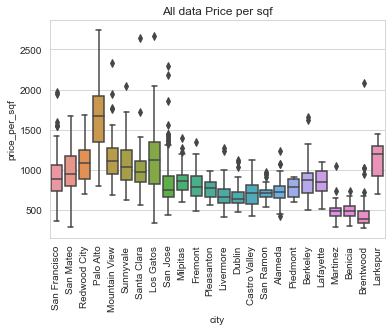

In [29]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'city', y = 'price_per_sqf', data = SFdata)
plt.xticks(rotation = 90)
plt.title("All data Price per sqf")

The highest median of price per sqf belongs to Palo Alto city. 
It seems that properties in this city are pretty similar, and there is no outliers in the data.
Most outliers are in San Jose and Milpitas city data. The reason for it may be properties' distribtuion itself depending on the property feature. Also, different areas of the city may differ significantly. There is a need to investigate crime rate maps for each city for that.


In [30]:
#calculating the average price per sqf in each city
avg = SFdata.groupby('city').mean('price_per_sqf').sort_values(by=['price_per_sqf'], ascending=False)

In [31]:
print(avg)


               lotAreaValue         price  bedrooms   longitude   latitude  \
city                                                                         
Palo Alto       4139.751833  3.098419e+06  3.215686 -122.139166  37.435404   
Mountain View   2071.722237  1.674957e+06  2.861538 -122.082240  37.396968   
Los Gatos       2992.057722  2.085743e+06  3.000000 -121.961823  37.221327   
Larkspur        4810.050640  1.923800e+06  2.600000 -122.537959  37.934161   
Redwood City    3687.044252  1.781483e+06  3.031250 -122.237489  37.481508   
Sunnyvale       3366.781784  1.701470e+06  3.015873 -122.021990  37.370289   
Santa Clara     3242.981533  1.474782e+06  2.916667 -121.968924  37.361859   
San Mateo       2225.168733  1.498588e+06  2.615894 -122.310387  37.553581   
San Francisco   2530.538753  1.616654e+06  3.380753 -122.445234  37.743224   
Milpitas        4244.494909  1.338548e+06  3.393939 -121.894783  37.435856   
Berkeley        4254.746951  1.166179e+06  2.639344 -122.274738 

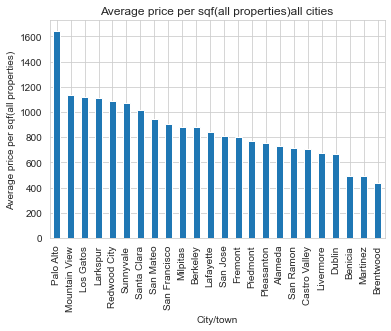

In [32]:
#plotting the results in barplot
avg['price_per_sqf'].plot(kind='bar')
_=plt.xlabel('City/town')
_ = plt.ylabel('Average price per sqf(all properties)')
_ = plt.title('Average price per sqf(all properties)all cities')

From box plot and bar plot we can see that results of average prices per sqf and medians are similar. <br> Cities with highest prices are: <br> Palo Alto, Mountain View, Larkspur, Los Gatos, Redwood City, Sunnyvale <br> Cities with lowest prices: <br> Benicia, Martinez, Brentwood

# Single Family Real Estate all data


In [33]:
single_fam_data = SFdata.loc[SFdata['propertyType']=='SINGLE_FAMILY']


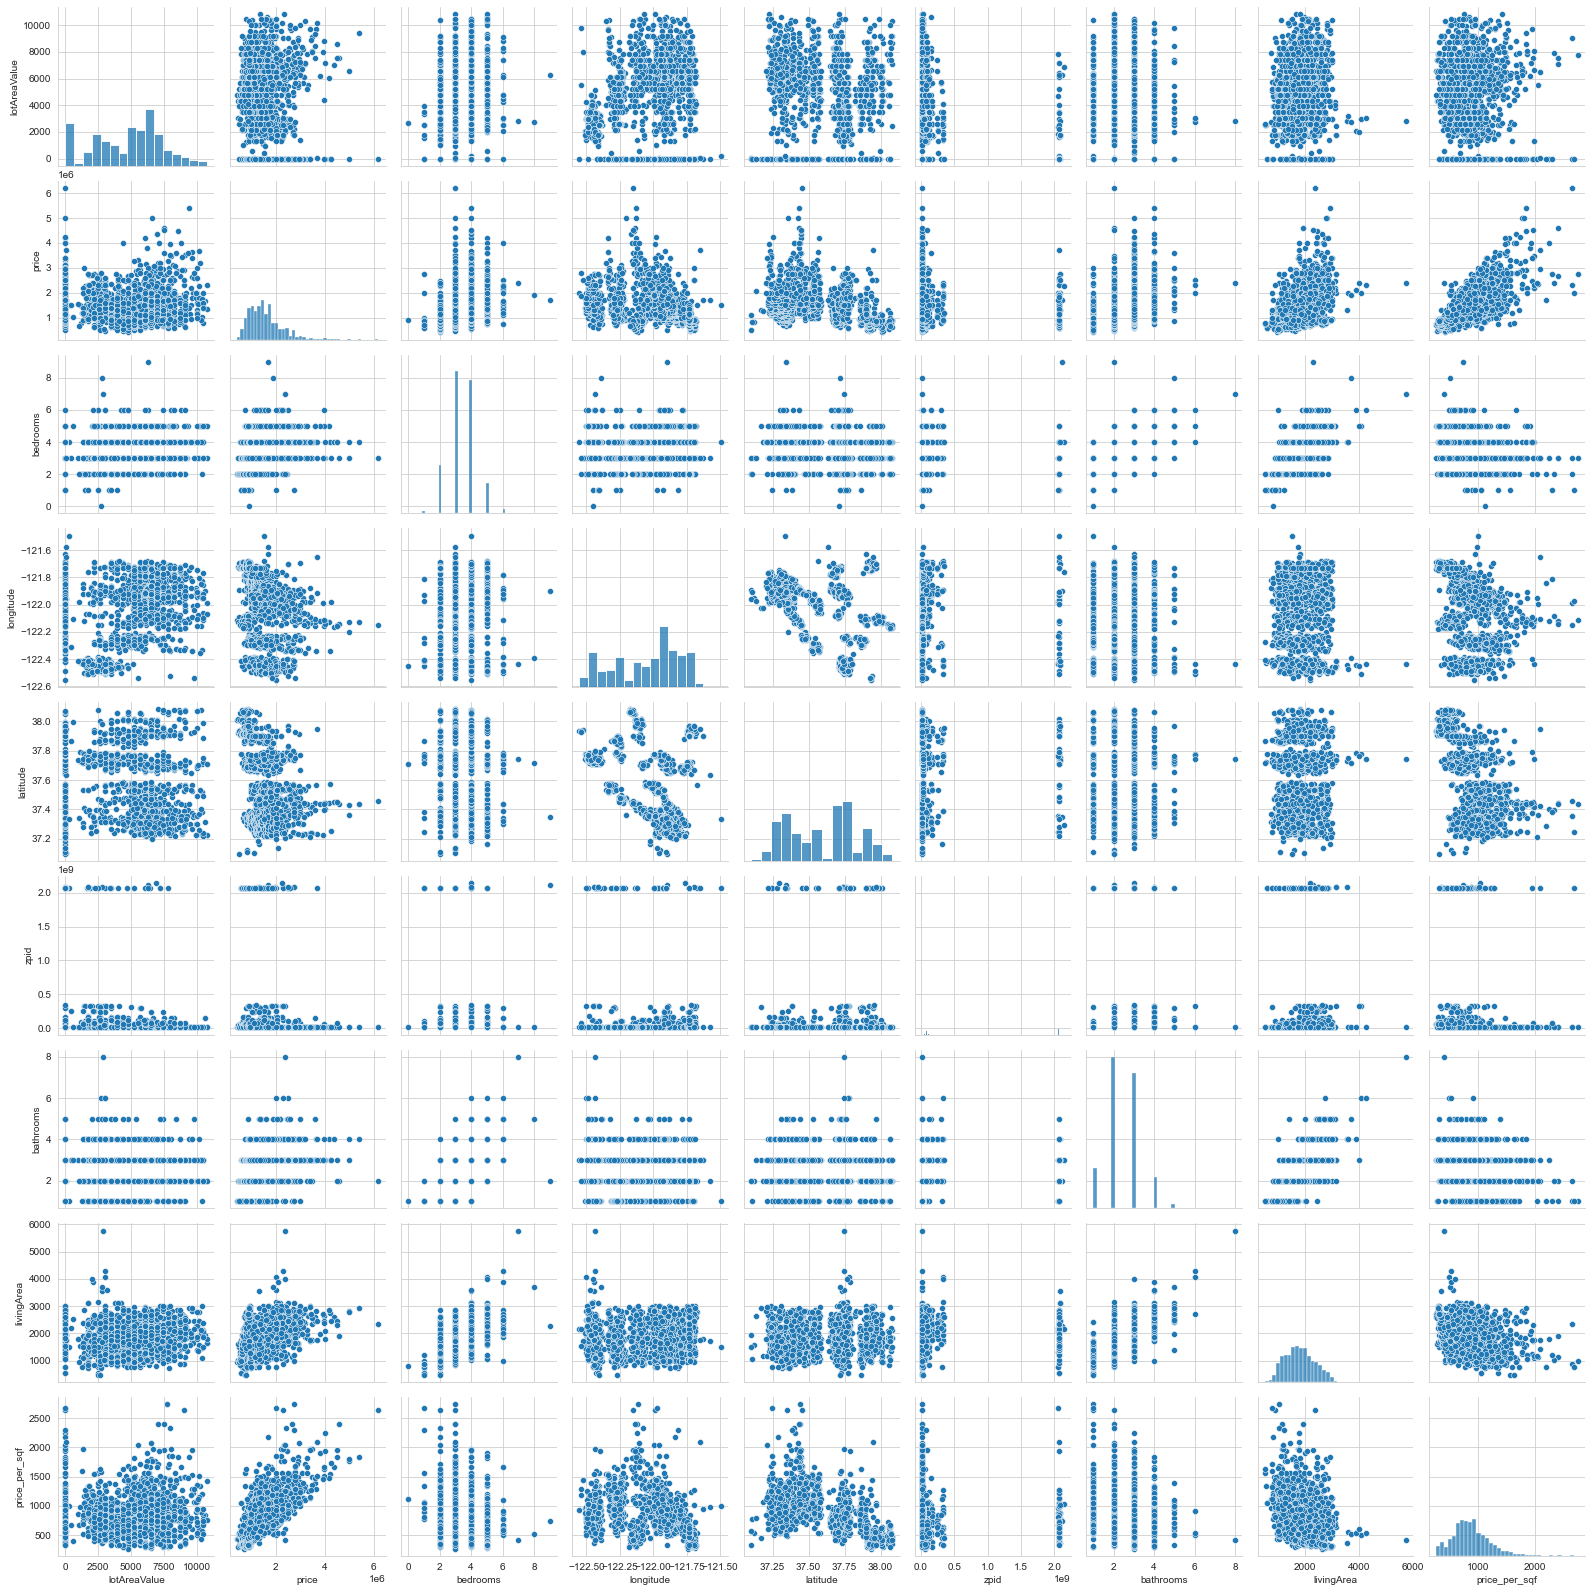

In [34]:
sns.pairplot(single_fam_data,  palette='Set1')
plt.show()

Text(0.5, 1.0, 'Single Family Price per sqf Data')

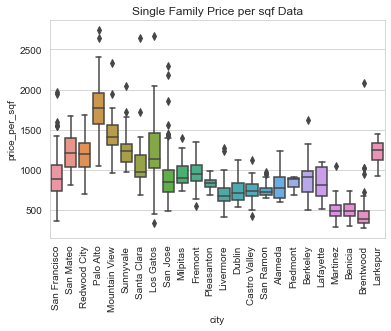

In [35]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'city', y = 'price_per_sqf', data = single_fam_data)
plt.xticks(rotation = 90)
plt.title("Single Family Price per sqf Data")

From histograms of 'Data Distribution by City' and 'Data Distribution by Property Type' we could see that most data falls to single family properties in San Jose. Would like to explore this city more.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

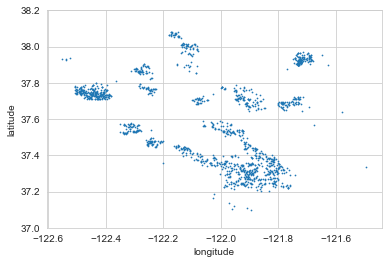

In [36]:
#mapping all single family data:
single_fam_data.plot.scatter(x='longitude', y='latitude', ylim = (37.0, 38.2) , s=0.5)

# Single Family Real Estate San Jose


In [37]:
#selecting data only from San Jose city
san_jose_data = single_fam_data.loc[single_fam_data['city']=='San Jose']

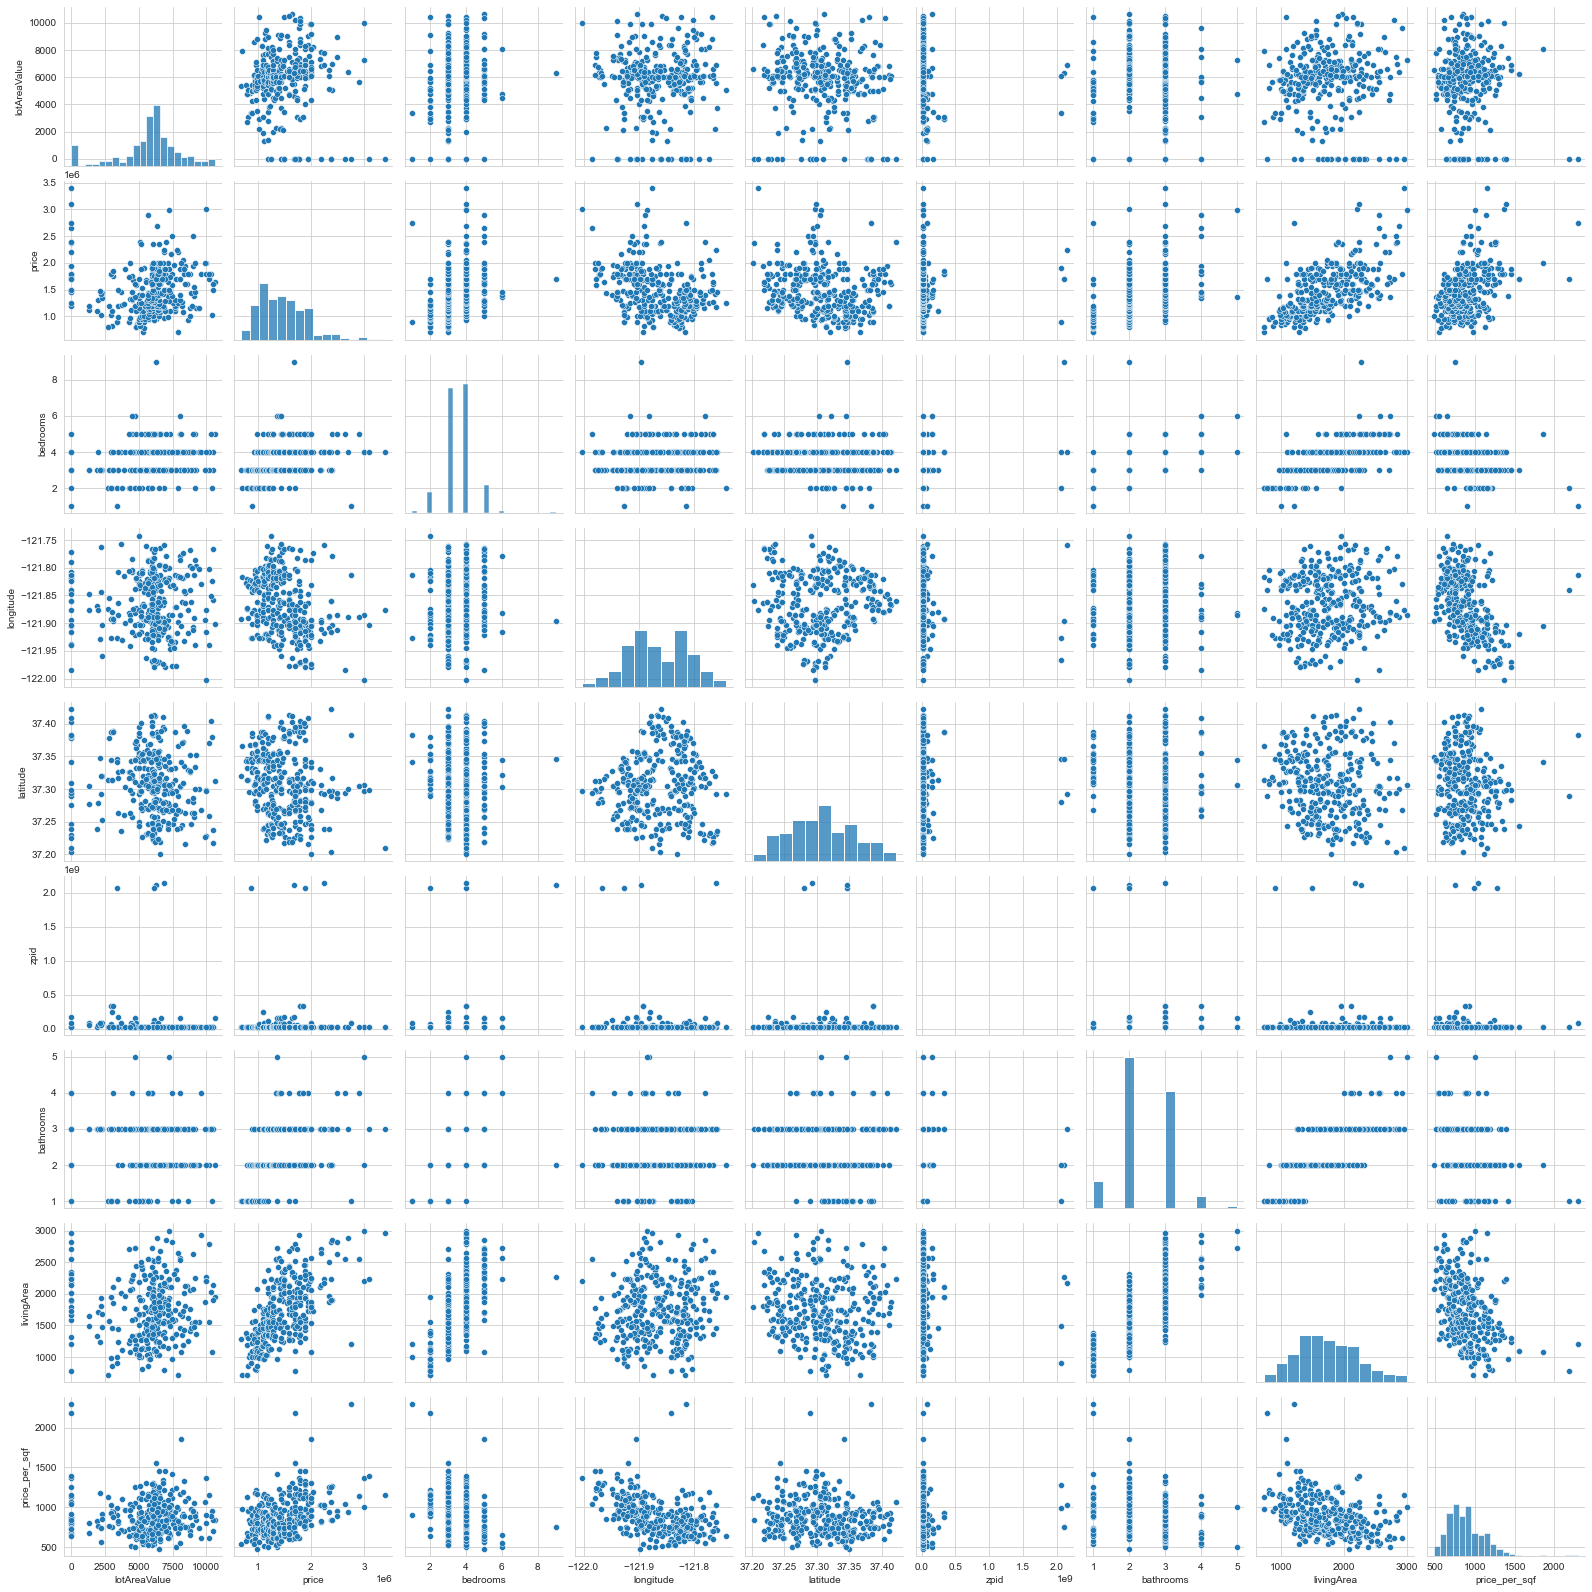

In [38]:
sns.pairplot(san_jose_data,  palette='Set1')
plt.show()

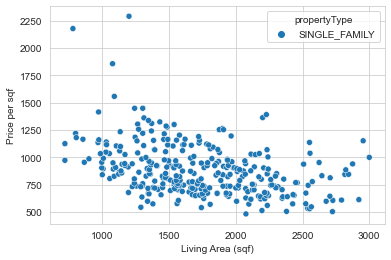

In [39]:
#creating a graph of San Jose City data 

sns.scatterplot(data=san_jose_data, x="livingArea", y="price_per_sqf", hue="propertyType", style = 'propertyType')


#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Living Area (sqf)")
plt.ylabel("Price per sqf")
#plt.legend()
plt.show()

# Single Family Real Estate San Francisco City

In [40]:
#selecting data only from San Jose city
SF_city_data = single_fam_data.loc[single_fam_data['city']=='San Francisco']

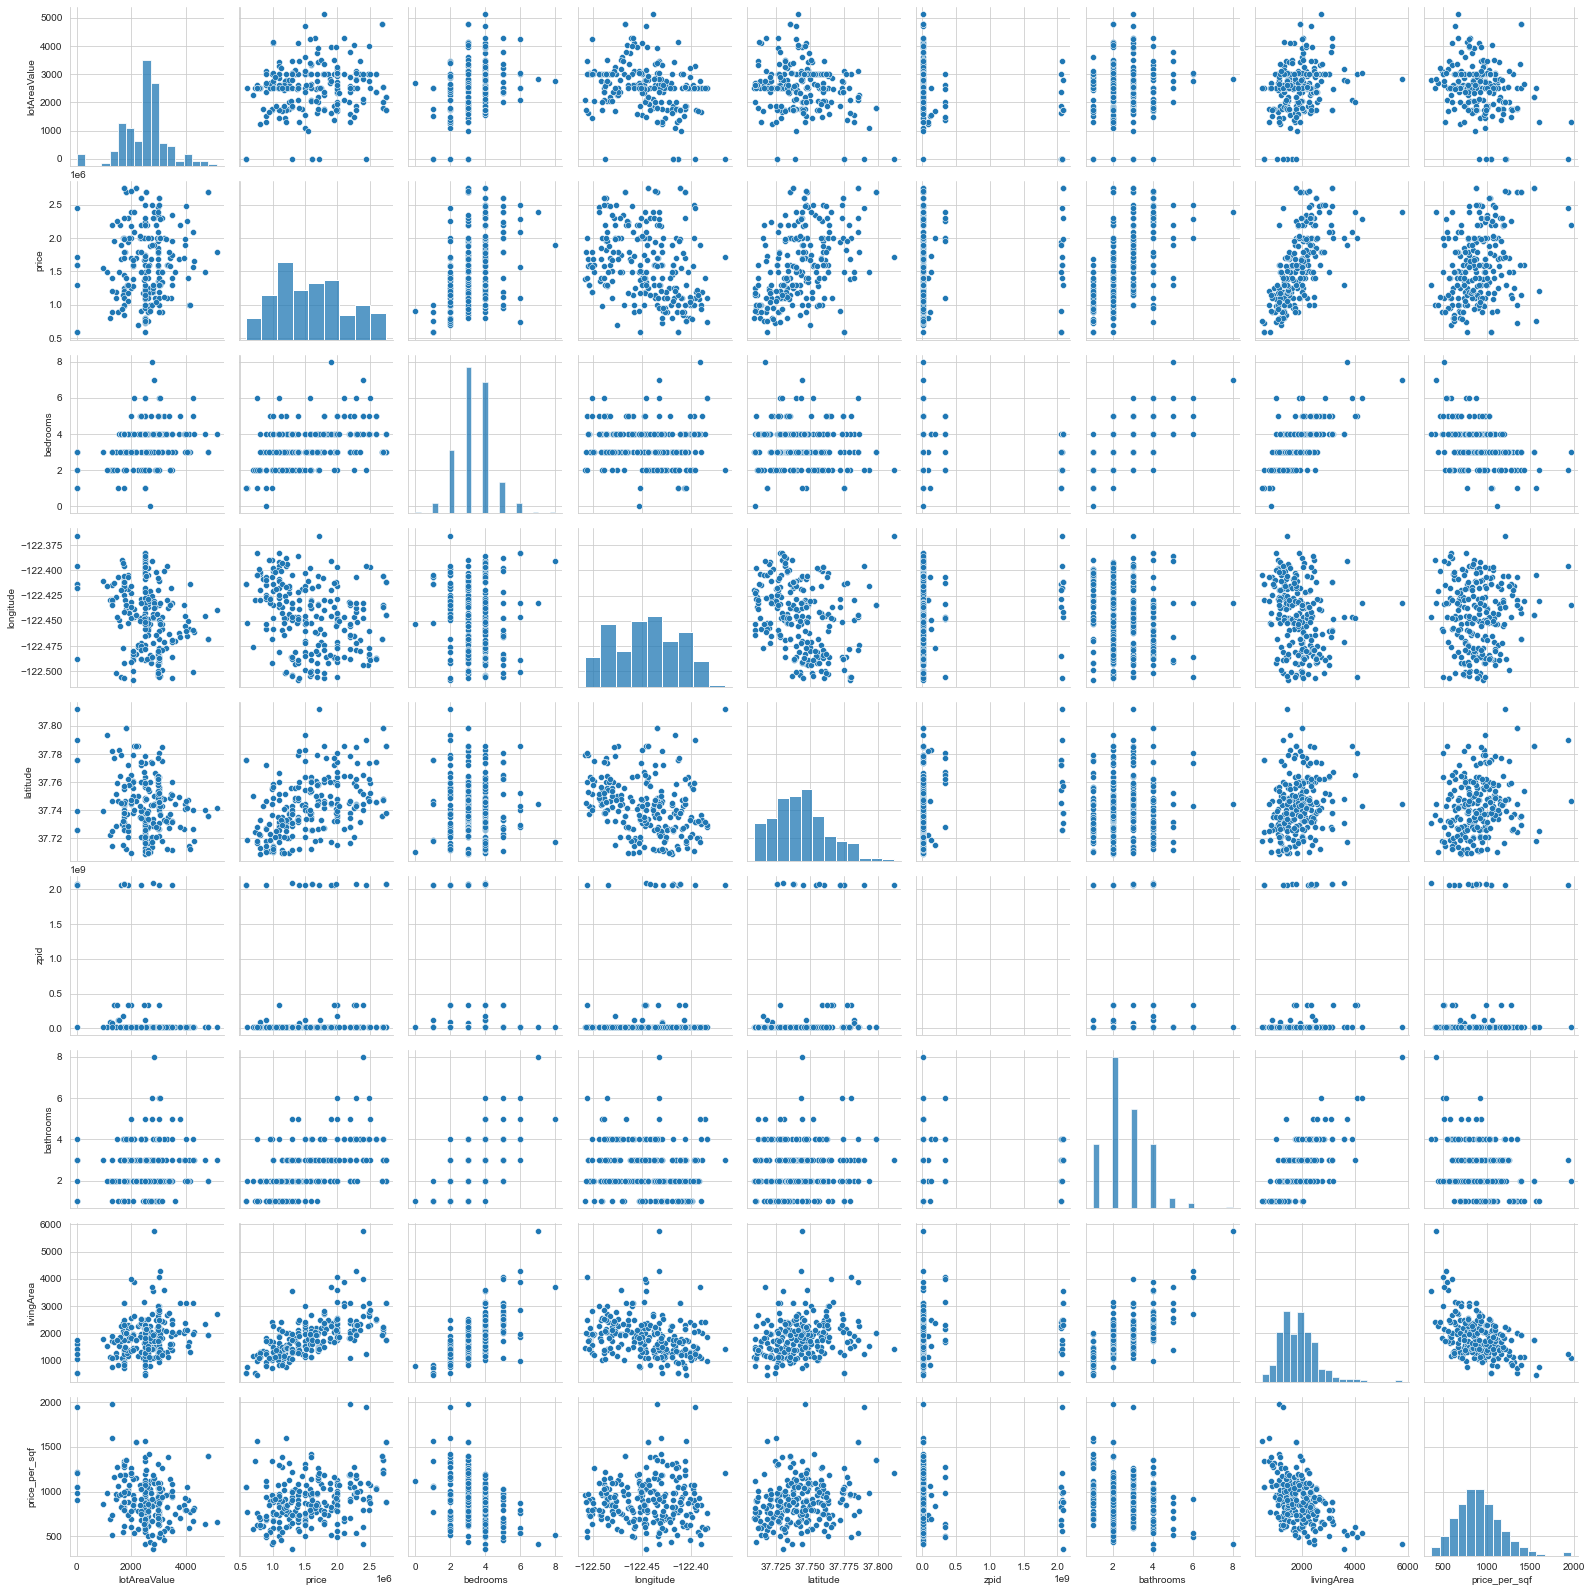

In [41]:
sns.pairplot(SF_city_data,  palette='Set1')
plt.show()

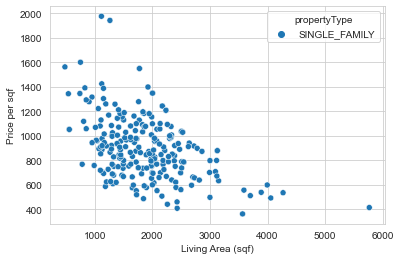

In [42]:
#creating a graph of San Francisco City data 

sns.scatterplot(data=SF_city_data, x="livingArea", y="price_per_sqf", hue="propertyType", style = 'propertyType')


#ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel("Living Area (sqf)")
plt.ylabel("Price per sqf")
#plt.legend()
plt.show()

# Home Affordability (Index) (HAI)


C.A.R.'s First-time Buyer Housing Affordability Index (FTB-HAI) measures the percentage of households that can afford to purchase an entry-level home in California.

In [99]:
# data from https://www.car.org/en/marketdata/data/ftbhai

HAI = pd.read_excel('HAI.xlsx')
HAI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q32022,First Time Buyer Housing Affordability Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STATE/REGION/COUNTY,Q32022,Q22022,,Q32021,,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income,NaN,NaN,NaN,


In [100]:
HAI = HAI.iloc[4:]
HAI.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
4,STATE/REGION/COUNTY,Q32022,Q22022,,Q32021,,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income,NaN,NaN,NaN,
5,CA SFH (SAAR),35.592492,34.097012,NaN,41.79033,NaN,705300.0,4050.0,121500.0,NaN,NaN,NaN,NaN
6,CA Condo/Townhomes,47.921578,45.946608,NaN,54.571181,NaN,535500.0,3070.0,92100.0,NaN,NaN,NaN,NaN
7,Los Angeles Metropolitan Area,36.938108,36.19688,NaN,44.34966,NaN,650250.0,3730.0,111900.0,NaN,NaN,NaN,NaN
8,Inland Empire,46.359345,46.159732,NaN,54.956267,NaN,481950.0,2770.0,83100.0,NaN,NaN,NaN,NaN


In [101]:
HAI = HAI.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis=1)

In [102]:
print(HAI)

                       Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 4  \
4             STATE/REGION/COUNTY     Q32022     Q22022     Q32021   
5                   CA SFH (SAAR)  35.592492  34.097012   41.79033   
6              CA Condo/Townhomes  47.921578  45.946608  54.571181   
7   Los Angeles Metropolitan Area  36.938108   36.19688   44.34966   
8                   Inland Empire  46.359345  46.159732  54.956267   
9                   S.F. Bay Area  33.085898  27.559159  37.154533   
10                             US  58.518382  58.183824  66.101125   
11                            NaN        NaN        NaN        NaN   
12                  S.F. Bay Area        NaN        NaN        NaN   
13                        Alameda  30.759034  24.927554   34.77434   
14                   Contra Costa  45.298183  41.056785  50.281323   
15                          Marin  25.300819  24.239874  31.733556   
16                           Napa  28.434776  32.974528  41.523504   
17                  

In [103]:
HAI.dropna()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 7,Unnamed: 8
4,STATE/REGION/COUNTY,Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
5,CA SFH (SAAR),35.592492,34.097012,41.79033,705300.0,4050.0,121500.0
6,CA Condo/Townhomes,47.921578,45.946608,54.571181,535500.0,3070.0,92100.0
7,Los Angeles Metropolitan Area,36.938108,36.19688,44.34966,650250.0,3730.0,111900.0
8,Inland Empire,46.359345,46.159732,54.956267,481950.0,2770.0,83100.0
9,S.F. Bay Area,33.085898,27.559159,37.154533,1075250.0,6170.0,185100.0
10,US,58.518382,58.183824,66.101125,338730.0,1940.0,58200.0
13,Alameda,30.759034,24.927554,34.77434,1071000.0,6150.0,184500.0
14,Contra Costa,45.298183,41.056785,50.281323,753310.0,4320.0,129600.0
15,Marin,25.300819,24.239874,31.733556,1445000.0,8290.0,248700.0


In [104]:
HAI.columns =['Counties','Q32022', 'Q22022', 'Q32021', 'Median Home Price', 'Monthly Payment Including Taxes & Insurance', 'Minimum Qualifying Income' ]

In [105]:
HAI.head()

,Counties,Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
4,STATE/REGION/COUNTY,Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
5,CA SFH (SAAR),35.592492,34.097012,41.79033,705300.0,4050.0,121500.0
6,CA Condo/Townhomes,47.921578,45.946608,54.571181,535500.0,3070.0,92100.0
7,Los Angeles Metropolitan Area,36.938108,36.19688,44.34966,650250.0,3730.0,111900.0
8,Inland Empire,46.359345,46.159732,54.956267,481950.0,2770.0,83100.0


In [106]:
counties_HAI = HAI.iloc[9:19,:]
print(counties_HAI)

         Counties     Q32022     Q22022     Q32021 Median Home Price  \
13        Alameda  30.759034  24.927554   34.77434         1071000.0   
14   Contra Costa  45.298183  41.056785  50.281323          753310.0   
15          Marin  25.300819  24.239874  31.733556         1445000.0   
16           Napa  28.434776  32.974528  41.523504          935000.0   
17  San Francisco  27.863185  24.791125  28.671925         1411000.0   
18      San Mateo  26.799777  24.273244  26.444116         1641350.0   
19    Santa Clara  27.849691  25.901293  32.982214         1434800.0   
20         Solano  54.289904  53.846403  62.029181          505750.0   
21         Sonoma  38.673527  37.659525  48.489274          701250.0   

   Monthly Payment Including Taxes & Insurance Minimum Qualifying Income  
13                                      6150.0                  184500.0  
14                                      4320.0                  129600.0  
15                                      8290.0        

In [107]:
counties_HAI.head()

,Counties,Q32022,Q22022,Q32021,Median Home Price,Monthly Payment Including Taxes & Insurance,Minimum Qualifying Income
13,Alameda,30.759034,24.927554,34.77434,1071000.0,6150.0,184500.0
14,Contra Costa,45.298183,41.056785,50.281323,753310.0,4320.0,129600.0
15,Marin,25.300819,24.239874,31.733556,1445000.0,8290.0,248700.0
16,Napa,28.434776,32.974528,41.523504,935000.0,5370.0,161100.0
17,San Francisco,27.863185,24.791125,28.671925,1411000.0,8100.0,243000.0


Text(0.5, 1.0, 'Home Affordability Index in Bay Area Counties')

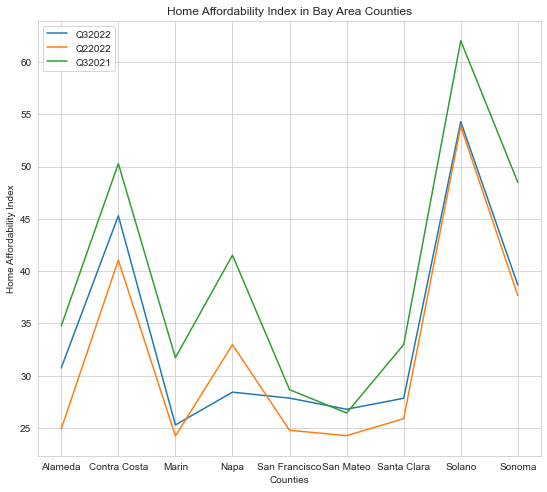

In [111]:

counties_HAI_table = pd.DataFrame(counties_HAI, columns=["Counties", "Q32022", "Q22022", "Q32021"])
counties_HAI_table.plot( x='Counties', y = ['Q32022','Q22022','Q32021'], kind = "line", figsize=(9, 8))

plt.ylabel('Home Affordability Index')
plt.title( "Home Affordability Index in Bay Area Counties")

Most affordable is Solano county, where over 60% first time buyers can affrod housing, next goes Contra Costa County, and Napa.
Least affordable Marin, San Francisco, San Mateo, Alameda counties.


If we compare all metrics presented in the project, we can make a hypothess that the best propety to buy for a first time buyers family, is the single family property in Contra Costa county.
Further data analysis and manipulation will show if environmental, economical factors will change current decision.
